In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout,Input,Activation,Dense
from tensorflow.keras.models import Sequential,Model,load_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold

# 모델링

In [2]:
def modeling():
    inputs = Input(shape=(28,28,1))
    x = inputs
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = _x
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    _x = Conv2D(128,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(256,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(512,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(1024,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    _x = Conv2D(512,3,padding='same')(x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    _x = Conv2D(128,3,padding='same')(_x)
    _x = BatchNormalization()(_x)
    _x = Activation('relu')(_x)
    x = x+_x
    x = MaxPooling2D(2)(x)
    x = Flatten()(x)
    x = Dense(2048)(x)
    x = Dense(10,activation='softmax')(x)
    outputs=x
    model = Model(inputs=inputs,outputs=outputs)
    return model

# 하이퍼 파라미터

In [3]:
epochs = 2000
es = EarlyStopping(monitor='val_loss',patience=160)
reLR = ReduceLROnPlateau(patience=120,verbose=1,factor=0.8)
kfold = StratifiedKFold(n_splits=40,random_state=42,shuffle=True)

datagen = ImageDataGenerator(height_shift_range=(-1,1),width_shift_range=(-1,1))
datagen2 = ImageDataGenerator()

# 데이터 불러오기 및 전처리

In [4]:
df = pd.read_csv("train.csv",index_col=[0])
y = df.values[:,0].astype('int32')
x = df.values[:,2:].astype('float32')/255.0
# print(x.shape,y.shape)               # (2048, 28, 28) (2048,)
#onehot = OneHotEncoder()
#y = onehot.fit_transform(y.reshape(-1,1)).toarray().astype('float32')
x = x.reshape(-1,28,28,1)
# x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.15)
# x_train = x_train.reshape(-1,28,28,1)#[:,2:26,2:26,:]
# x_val = x_val.reshape(-1,28,28,1)#[:,2:26,2:26,:]
# print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)
print(x.shape,y.shape) 
y

(2048, 28, 28, 1) (2048,)


array([5, 0, 4, ..., 9, 0, 5])

In [ ]:
index=1
result = 0
for train_index,val_index in kfold.split(x,y):
    if index<=13:
        index+=1
        continue
        
    modelpath = './AI_models/02_04_AI_val_loss_index_{}.h5'.format(index)
    modelpath2 = './AI_models/02_04_AI_val_accuracy_index_{}.h5'.format(index)
    cp = ModelCheckpoint(monitor = 'val_loss',filepath=modelpath,save_best_only=True,verbose=1)
    cp2 = ModelCheckpoint(monitor = 'val_accuracy',filepath=modelpath2,save_best_only=True,verbose=1)


    x_train = x[train_index]
    x_val = x[val_index]
    y_train = y[train_index]
    y_val = y[val_index]

    onehot = OneHotEncoder()
    y_train = onehot.fit_transform(y_train.reshape(-1,1)).toarray().astype('float32')
    y_val = onehot.fit_transform(y_val.reshape(-1,1)).toarray().astype('float32')

    train_generator = datagen.flow(x_train,y_train,batch_size=32)
    val_generator = datagen.flow(x_val,y_val)
    model = modeling()
    model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
    model.fit_generator(train_generator,validation_data = val_generator,epochs=epochs,callbacks=[cp,es,reLR,cp2])

    model = load_model(modelpath)
    model2 = load_model(modelpath2)
    df = pd.read_csv("test.csv",index_col=[0])
    x_test = df.values[:,1:].reshape(-1,28,28).astype('float32')/255.0
    y_pred = model.predict(x_test)
    y_pred2 = model2.predict(x_test)
    y_pred = np.argmax(y_pred,axis=-1)
    y_pred2 = np.argmax(y_pred2,axis=-1)
    df_sub = pd.read_csv('submission.csv',index_col=0)
    df_sub['digit'] = y_pred
    df_sub.to_csv('./AI_models/loss_kfold_{}.csv'.format(index))
    df_sub['digit'] = y_pred2
    df_sub.to_csv('./AI_models/accuracy_kfold_{}.csv'.format(index))

    print(index, " 번째 학습을 완료했습니다.")
    index+=1


    
"""
0.905
"""

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2000
63/63 [==============================] - ETA: 0s - loss: 3.9512 - accuracy: 0.1047
Epoch 00001: val_loss improved from inf to 49090.88281, saving model to ./AI_models\02_04_AI_val_loss_index_14.h5

Epoch 00001: val_accuracy improved from -inf to 0.11765, saving model to ./AI_models\02_04_AI_val_accuracy_index_14.h5
63/63 [==============================] - 24s 386ms/step - loss: 3.9512 - accuracy: 0.1047 - val_loss: 49090.8828 - val_accuracy: 0.1176
Epoch 2/2000
63/63 [==============================] - ETA: 0s - loss: 2.2494 - accuracy: 0.1612
Epoch 00002: val_loss improved from 49090.88281 to 2355.42407, saving model to ./AI_models\02_04_AI_val_loss_index_14.h5

Epoch 00002: val_accuracy did not improve from 0.11765
63/63 [==============================] - 20s 315ms/step - loss: 2.2494 - accuracy: 0.1612 - val_loss: 2355.4241 - val_accuracy: 0.1176
Epoch 3/2000
63/63 [==============================

Epoch 21/2000
63/63 [==============================] - ETA: 0s - loss: 0.2791 - accuracy: 0.8993
Epoch 00021: val_loss did not improve from 0.41361

Epoch 00021: val_accuracy improved from 0.84314 to 0.90196, saving model to ./AI_models\02_04_AI_val_accuracy_index_14.h5
63/63 [==============================] - 31s 493ms/step - loss: 0.2791 - accuracy: 0.8993 - val_loss: 0.4783 - val_accuracy: 0.9020
Epoch 22/2000
63/63 [==============================] - ETA: 0s - loss: 0.2476 - accuracy: 0.9124
Epoch 00022: val_loss improved from 0.41361 to 0.30182, saving model to ./AI_models\02_04_AI_val_loss_index_14.h5

Epoch 00022: val_accuracy did not improve from 0.90196
63/63 [==============================] - 31s 496ms/step - loss: 0.2476 - accuracy: 0.9124 - val_loss: 0.3018 - val_accuracy: 0.8824
Epoch 23/2000
63/63 [==============================] - ETA: 0s - loss: 0.2770 - accuracy: 0.9064
Epoch 00023: val_loss did not improve from 0.30182

Epoch 00023: val_accuracy did not improve from 0.

63/63 [==============================] - ETA: 0s - loss: 0.0587 - accuracy: 0.9835
Epoch 00044: val_loss did not improve from 0.04887

Epoch 00044: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 282ms/step - loss: 0.0587 - accuracy: 0.9835 - val_loss: 0.1898 - val_accuracy: 0.9412
Epoch 45/2000
63/63 [==============================] - ETA: 0s - loss: 0.0817 - accuracy: 0.9760
Epoch 00045: val_loss did not improve from 0.04887

Epoch 00045: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 283ms/step - loss: 0.0817 - accuracy: 0.9760 - val_loss: 0.1717 - val_accuracy: 0.9608
Epoch 46/2000
63/63 [==============================] - ETA: 0s - loss: 0.1420 - accuracy: 0.9614
Epoch 00046: val_loss did not improve from 0.04887

Epoch 00046: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 283ms/step - loss: 0.1420 - accuracy: 0.9614 - val_loss: 0.3668 - val_accuracy: 0.8824
Epoch 


Epoch 00068: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 282ms/step - loss: 0.1355 - accuracy: 0.9609 - val_loss: 0.7397 - val_accuracy: 0.8431
Epoch 69/2000
63/63 [==============================] - ETA: 0s - loss: 0.0688 - accuracy: 0.9790
Epoch 00069: val_loss did not improve from 0.04887

Epoch 00069: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 282ms/step - loss: 0.0688 - accuracy: 0.9790 - val_loss: 0.4401 - val_accuracy: 0.9020
Epoch 70/2000
63/63 [==============================] - ETA: 0s - loss: 0.1416 - accuracy: 0.9594
Epoch 00070: val_loss did not improve from 0.04887

Epoch 00070: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 282ms/step - loss: 0.1416 - accuracy: 0.9594 - val_loss: 0.3177 - val_accuracy: 0.9216
Epoch 71/2000
63/63 [==============================] - ETA: 0s - loss: 0.1281 - accuracy: 0.9594
Epoch 00071: val_loss did not improve from 

Epoch 93/2000
63/63 [==============================] - ETA: 0s - loss: 0.0758 - accuracy: 0.9780
Epoch 00093: val_loss did not improve from 0.04887

Epoch 00093: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 282ms/step - loss: 0.0758 - accuracy: 0.9780 - val_loss: 0.5020 - val_accuracy: 0.8627
Epoch 94/2000
63/63 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9855
Epoch 00094: val_loss did not improve from 0.04887

Epoch 00094: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 282ms/step - loss: 0.0356 - accuracy: 0.9855 - val_loss: 0.2559 - val_accuracy: 0.9216
Epoch 95/2000
63/63 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9885
Epoch 00095: val_loss did not improve from 0.04887

Epoch 00095: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 282ms/step - loss: 0.0341 - accuracy: 0.9885 - val_loss: 0.2054 - val_accuracy:

Epoch 117/2000
63/63 [==============================] - ETA: 0s - loss: 0.7424 - accuracy: 0.8558
Epoch 00117: val_loss did not improve from 0.04887

Epoch 00117: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 281ms/step - loss: 0.7424 - accuracy: 0.8558 - val_loss: 1.7986 - val_accuracy: 0.7451
Epoch 118/2000
63/63 [==============================] - ETA: 0s - loss: 0.2484 - accuracy: 0.9279
Epoch 00118: val_loss did not improve from 0.04887

Epoch 00118: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 281ms/step - loss: 0.2484 - accuracy: 0.9279 - val_loss: 0.7470 - val_accuracy: 0.8627
Epoch 119/2000
63/63 [==============================] - ETA: 0s - loss: 0.1001 - accuracy: 0.9670
Epoch 00119: val_loss did not improve from 0.04887

Epoch 00119: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 281ms/step - loss: 0.1001 - accuracy: 0.9670 - val_loss: 0.3972 - val_accura


Epoch 00141: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 282ms/step - loss: 0.0222 - accuracy: 0.9950 - val_loss: 0.3890 - val_accuracy: 0.9412
Epoch 142/2000
63/63 [==============================] - ETA: 0s - loss: 0.0509 - accuracy: 0.9830
Epoch 00142: val_loss did not improve from 0.04887

Epoch 00142: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 282ms/step - loss: 0.0509 - accuracy: 0.9830 - val_loss: 0.9128 - val_accuracy: 0.8431
Epoch 143/2000
63/63 [==============================] - ETA: 0s - loss: 0.0403 - accuracy: 0.9865
Epoch 00143: val_loss did not improve from 0.04887

Epoch 00143: val_accuracy did not improve from 0.98039
63/63 [==============================] - 18s 281ms/step - loss: 0.0403 - accuracy: 0.9865 - val_loss: 0.5465 - val_accuracy: 0.9608
Epoch 144/2000
63/63 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9910
Epoch 00144: val_loss did not improve fr

Epoch 165/2000
63/63 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9950
Epoch 00165: val_loss did not improve from 0.01909

Epoch 00165: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 282ms/step - loss: 0.0175 - accuracy: 0.9950 - val_loss: 0.2403 - val_accuracy: 0.9020
Epoch 166/2000
63/63 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9945
Epoch 00166: val_loss did not improve from 0.01909

Epoch 00166: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 282ms/step - loss: 0.0148 - accuracy: 0.9945 - val_loss: 0.2102 - val_accuracy: 0.9804
Epoch 167/2000
63/63 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9860
Epoch 00167: val_loss did not improve from 0.01909

Epoch 00167: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 282ms/step - loss: 0.0593 - accuracy: 0.9860 - val_loss: 0.2853 - val_accura

63/63 [==============================] - ETA: 0s - loss: 0.0430 - accuracy: 0.9910
Epoch 00189: val_loss did not improve from 0.01909

Epoch 00189: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 0.0430 - accuracy: 0.9910 - val_loss: 0.1140 - val_accuracy: 0.9608
Epoch 190/2000
63/63 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9910
Epoch 00190: val_loss did not improve from 0.01909

Epoch 00190: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 0.0432 - accuracy: 0.9910 - val_loss: 0.1503 - val_accuracy: 0.9412
Epoch 191/2000
63/63 [==============================] - ETA: 0s - loss: 0.0515 - accuracy: 0.9845
Epoch 00191: val_loss did not improve from 0.01909

Epoch 00191: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 0.6805 - val_accuracy: 0.8824
Epoc

63/63 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9995
Epoch 00213: val_loss did not improve from 0.01865

Epoch 00213: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 282ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1677 - val_accuracy: 0.9608
Epoch 214/2000
63/63 [==============================] - ETA: 0s - loss: 3.2299e-04 - accuracy: 1.0000
Epoch 00214: val_loss did not improve from 0.01865

Epoch 00214: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 282ms/step - loss: 3.2299e-04 - accuracy: 1.0000 - val_loss: 0.2318 - val_accuracy: 0.9608
Epoch 215/2000
63/63 [==============================] - ETA: 0s - loss: 1.7204e-04 - accuracy: 1.0000
Epoch 00215: val_loss did not improve from 0.01865

Epoch 00215: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 282ms/step - loss: 1.7204e-04 - accuracy: 1.0000 - val_loss: 0.1512 - val_accur

63/63 [==============================] - ETA: 0s - loss: 0.1899 - accuracy: 0.9690
Epoch 00237: val_loss did not improve from 0.01865

Epoch 00237: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 0.1899 - accuracy: 0.9690 - val_loss: 7.1899 - val_accuracy: 0.5686
Epoch 238/2000
63/63 [==============================] - ETA: 0s - loss: 0.0802 - accuracy: 0.9790
Epoch 00238: val_loss did not improve from 0.01865

Epoch 00238: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 0.0802 - accuracy: 0.9790 - val_loss: 0.7479 - val_accuracy: 0.8824
Epoch 239/2000
63/63 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9915
Epoch 00239: val_loss did not improve from 0.01865

Epoch 00239: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 0.0344 - accuracy: 0.9915 - val_loss: 0.4686 - val_accuracy: 0.9412
Epoc

Epoch 261/2000
63/63 [==============================] - ETA: 0s - loss: 5.9046e-05 - accuracy: 1.0000
Epoch 00261: val_loss did not improve from 0.01865

Epoch 00261: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 5.9046e-05 - accuracy: 1.0000 - val_loss: 0.4743 - val_accuracy: 0.9412
Epoch 262/2000
63/63 [==============================] - ETA: 0s - loss: 1.6954e-05 - accuracy: 1.0000
Epoch 00262: val_loss did not improve from 0.01865

Epoch 00262: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 1.6954e-05 - accuracy: 1.0000 - val_loss: 0.2142 - val_accuracy: 0.9804
Epoch 263/2000
63/63 [==============================] - ETA: 0s - loss: 4.0135e-05 - accuracy: 1.0000
Epoch 00263: val_loss did not improve from 0.01865

Epoch 00263: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 4.0135e-05 - accuracy: 1.0000 - val_l

Epoch 285/2000
63/63 [==============================] - ETA: 0s - loss: 8.2474e-06 - accuracy: 1.0000
Epoch 00285: val_loss did not improve from 0.01865

Epoch 00285: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 8.2474e-06 - accuracy: 1.0000 - val_loss: 0.3030 - val_accuracy: 0.9608
Epoch 286/2000
63/63 [==============================] - ETA: 0s - loss: 1.0636e-05 - accuracy: 1.0000
Epoch 00286: val_loss did not improve from 0.01865

Epoch 00286: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 1.0636e-05 - accuracy: 1.0000 - val_loss: 0.1529 - val_accuracy: 0.9804
Epoch 287/2000
63/63 [==============================] - ETA: 0s - loss: 8.0253e-06 - accuracy: 1.0000
Epoch 00287: val_loss did not improve from 0.01865

Epoch 00287: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 8.0253e-06 - accuracy: 1.0000 - val_l

Epoch 309/2000
63/63 [==============================] - ETA: 0s - loss: 4.8286e-06 - accuracy: 1.0000
Epoch 00309: val_loss did not improve from 0.01865

Epoch 00309: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 4.8286e-06 - accuracy: 1.0000 - val_loss: 0.2880 - val_accuracy: 0.9608
Epoch 310/2000
63/63 [==============================] - ETA: 0s - loss: 4.7941e-06 - accuracy: 1.0000
Epoch 00310: val_loss did not improve from 0.01865

Epoch 00310: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 4.7941e-06 - accuracy: 1.0000 - val_loss: 0.1803 - val_accuracy: 0.9608
Epoch 311/2000
63/63 [==============================] - ETA: 0s - loss: 6.1976e-06 - accuracy: 1.0000
Epoch 00311: val_loss did not improve from 0.01865

Epoch 00311: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 6.1976e-06 - accuracy: 1.0000 - val_l

Epoch 333/2000
63/63 [==============================] - ETA: 0s - loss: 2.7083e-04 - accuracy: 1.0000
Epoch 00333: val_loss did not improve from 0.01865

Epoch 00333: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 2.7083e-04 - accuracy: 1.0000 - val_loss: 0.1768 - val_accuracy: 0.9412
Epoch 334/2000
63/63 [==============================] - ETA: 0s - loss: 2.6109e-04 - accuracy: 1.0000
Epoch 00334: val_loss did not improve from 0.01865

Epoch 00334: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 2.6109e-04 - accuracy: 1.0000 - val_loss: 0.1591 - val_accuracy: 0.9412
Epoch 335/2000
63/63 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 0.9995
Epoch 00335: val_loss did not improve from 0.01865

Epoch 00335: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 0.0010 - accuracy: 0.9995 - val_loss: 0.3

Epoch 357/2000
63/63 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9960
Epoch 00357: val_loss did not improve from 0.01865

Epoch 00357: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 280ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.4182 - val_accuracy: 0.9216
Epoch 358/2000
63/63 [==============================] - ETA: 0s - loss: 0.0644 - accuracy: 0.9840
Epoch 00358: val_loss did not improve from 0.01865

Epoch 00358: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 0.0644 - accuracy: 0.9840 - val_loss: 0.5472 - val_accuracy: 0.9020
Epoch 359/2000
63/63 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9755
Epoch 00359: val_loss did not improve from 0.01865

Epoch 00359: val_accuracy did not improve from 1.00000
63/63 [==============================] - 18s 281ms/step - loss: 0.0989 - accuracy: 0.9755 - val_loss: 0.0847 - val_accura

Epoch 12/2000
63/63 [==============================] - ETA: 0s - loss: 0.4855 - accuracy: 0.8373
Epoch 00012: val_loss improved from 2.08837 to 1.94751, saving model to ./AI_models\02_04_AI_val_loss_index_15.h5

Epoch 00012: val_accuracy improved from 0.49020 to 0.56863, saving model to ./AI_models\02_04_AI_val_accuracy_index_15.h5
63/63 [==============================] - 23s 365ms/step - loss: 0.4855 - accuracy: 0.8373 - val_loss: 1.9475 - val_accuracy: 0.5686
Epoch 13/2000
63/63 [==============================] - ETA: 0s - loss: 0.4932 - accuracy: 0.8363
Epoch 00013: val_loss improved from 1.94751 to 1.13810, saving model to ./AI_models\02_04_AI_val_loss_index_15.h5

Epoch 00013: val_accuracy improved from 0.56863 to 0.72549, saving model to ./AI_models\02_04_AI_val_accuracy_index_15.h5
63/63 [==============================] - 23s 365ms/step - loss: 0.4932 - accuracy: 0.8363 - val_loss: 1.1381 - val_accuracy: 0.7255
Epoch 14/2000
63/63 [==============================] - ETA: 0s - los

63/63 [==============================] - ETA: 0s - loss: 0.1292 - accuracy: 0.9549
Epoch 00034: val_loss did not improve from 0.41214

Epoch 00034: val_accuracy did not improve from 0.88235
63/63 [==============================] - 18s 282ms/step - loss: 0.1292 - accuracy: 0.9549 - val_loss: 0.7054 - val_accuracy: 0.8431
Epoch 35/2000
63/63 [==============================] - ETA: 0s - loss: 0.1292 - accuracy: 0.9599
Epoch 00035: val_loss did not improve from 0.41214

Epoch 00035: val_accuracy did not improve from 0.88235
63/63 [==============================] - 18s 282ms/step - loss: 0.1292 - accuracy: 0.9599 - val_loss: 1.2077 - val_accuracy: 0.7255
Epoch 36/2000
13/63 [=====>........................] - ETA: 13s - loss: 0.0859 - accuracy: 0.9615

In [ ]:
'''
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)

'''

In [ ]:
'''
0.87
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)
'''

In [ ]:
'''
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)
'''

In [26]:
model = load_model('./models/02_03_imger_best_index_1.h5')
df = pd.read_csv("test.csv",index_col=[0])
x_test = df.values[:,1:].reshape(-1,28,28).astype('float32')/255.0

In [ ]:
binary_model = []
for i in range(0,10):
    print(i)
    model = load_model('./binary_models/{}_binary.h5'.format(i))
    binary_model.append(model)



0
1
2
3
4
5
6
7
8
9


In [27]:
y_pred = model.predict(x_test)

def ordering(array):
    temp = array.copy()
    result = []
    for i in range(len(temp)):
        sol = np.argmax(temp)
        result.append(sol)
        temp[sol]=0
    return np.array(result)

In [ ]:
y_pred

array([[7.6569414e-08, 2.2260668e-08, 4.6740688e-06, ..., 2.5446711e-10,
        5.9703314e-07, 5.4656005e-11],
       [2.9817595e-16, 2.0647546e-12, 4.4424861e-16, ..., 2.6480063e-10,
        8.9294266e-11, 1.0000000e+00],
       [2.4707546e-05, 1.3310514e-01, 8.9886552e-03, ..., 9.1972132e-04,
        1.2284001e-02, 2.9377347e-06],
       ...,
       [8.6063210e-09, 7.5784501e-10, 2.6377617e-10, ..., 3.1178827e-13,
        1.2005766e-07, 6.1626551e-15],
       [1.0054513e-03, 2.9064235e-01, 1.6038346e-05, ..., 1.7447629e-06,
        8.1512779e-03, 4.5916289e-03],
       [9.9825722e-01, 6.9838888e-16, 2.4161539e-10, ..., 1.8471900e-15,
        6.6174334e-13, 1.4705076e-15]], dtype=float32)

In [ ]:
y_notyet = np.argmax(y_pred,axis=-1)
y_notyet


array([6, 9, 3, ..., 6, 5, 0], dtype=int64)

In [ ]:
binary_model[3].predict(x_test[0:2])

array([[3.88120088e-36],
       [1.13777095e-36]], dtype=float32)

In [ ]:
y_pred = model.predict(x_train)

NameError: name 'x_train' is not defined

In [ ]:
k=729

In [ ]:
k+=1
for i in [k]:
    temp_result = y_notyet[i]
    binary_result = binary_model[temp_result].predict(np.array([x_test[i].reshape(28,28,1)]))
    a=np.round(y_pred[i],3)
    print("원래모델 : ",temp_result,'\n원래모델확률 : ',a,"\n바이너리 : ",binary_result[0][0])
    print("0",binary_model[0].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("1",binary_model[1].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("2",binary_model[2].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("3",binary_model[3].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("4",binary_model[4].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("5",binary_model[5].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("6",binary_model[6].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("7",binary_model[7].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("8",binary_model[8].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("9",binary_model[9].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])


원래모델 :  9 
원래모델확률 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
바이너리 :  1.6463632e-24
0 0.0
1 5.6854813e-21
2 0.0
3 0.0
4 3.455557e-05
5 0.0
6 0.0
7 0.0
8 1.2415284e-22
9 1.6463632e-24


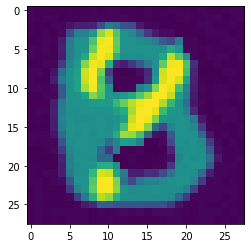

In [ ]:
plt.imshow(x_test[k])
plt.show()

In [28]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=-1)
df_sub = pd.read_csv('submission.csv',index_col=0)
df_sub['digit'] = y_pred
df_sub.to_csv('test_4.csv')
y_pred

array([6, 8, 8, ..., 6, 8, 0], dtype=int64)

array([6, 9, 8, ..., 6, 8, 0], dtype=int64)

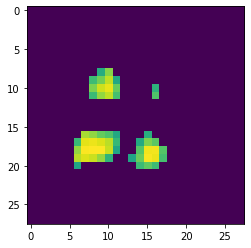

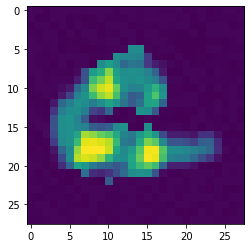

In [ ]:
k=5
df = pd.read_csv("preprocessing_150.csv",index_col=[0])
df2 = pd.read_csv("train.csv",index_col=[0])
plt.imshow(df.values[k,2:].reshape(28,28).astype('float32'))
plt.show()
df2 = pd.read_csv("train.csv",index_col=[0])
plt.imshow(df2.values[k,2:].reshape(28,28).astype('float32'))
plt.show()